<a href="https://colab.research.google.com/github/srpantano/LLM/blob/main/sentiment_classifier_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from transformers import pipeline
import pandas as pd
import plotly.express as px
import nltk
from nltk.corpus import stopwords

In [2]:
pip install pysentimiento

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from pysentimiento import create_analyzer

In [4]:
model = create_analyzer(task='sentiment', lang='pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/799k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [5]:
model.predict('''
A fritadeira é sensacional, muito além do que imaginava. É linda, super funcional e muito fácil de manusear.
Fácil de limpar e potente. Super recomendo.
''')

AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002})

In [6]:
model.predict('''
Após poucos meses de uso a carcaça de aço escavado começou a oxidar,
demonstrando a baixa qualidade de proteção. Fora esse detalhe, o produto cumpre o prometido.
''')

AnalyzerOutput(output=NEU, probas={NEU: 0.923, NEG: 0.064, POS: 0.013})

In [7]:
model.predict('''
Em menos de 1 ano parou de funcionar, enviei para assistência técnica por estar na garantia,
trocaram o motor, passou a ficar menos potente e não durou 2 utilizações.
Isso se repetiu várias vezes, até que desisti de ficar levando lá e queimando de novo em seguida,
vi outros clientes com o mesmo problema. Não comprem!!
''')

AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.056, POS: 0.009})

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/srpantano/hugging_face_alura/refs/heads/main/Dados/resenhas.csv')

In [10]:
data

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...
5,657,"Usei ela algumas vezes já, muito silenciosa, l..."
6,182,"Superou minhas expectativas, por enquanto tudo..."
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo..."
8,343,"Estou muito satisfeito com a negociação, receb..."
9,624,Lindaaaa amei super indico


In [11]:
results_preview = model.predict(data['Resenha'])
results_preview

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}),
 AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.990, NEU: 0.008, POS: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.003}),
 AnalyzerOutput(output=NEU, probas={NE

In [15]:
sentiment = []
for i in results_preview:
    sentiment.append(i.output)

In [16]:
sentiment

['POS',
 'POS',
 'POS',
 'NEG',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'POS',
 'POS',
 'NEU',
 'POS',
 'POS']

In [17]:
data['sentiment'] = sentiment

In [18]:
data

,ID,Resenha,sentiment
0,24,"A fritadeira é sensacional, muito além do que ...",POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS
2,865,"Muito funcional, prática e moderna.",POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...,POS
5,657,"Usei ela algumas vezes já, muito silenciosa, l...",POS
6,182,"Superou minhas expectativas, por enquanto tudo...",POS
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo...",POS
8,343,"Estou muito satisfeito com a negociação, receb...",POS
9,624,Lindaaaa amei super indico,POS


In [27]:
df_sentiment = data.groupby('sentiment').size().reset_index(name='count')

fig = px.bar(df_sentiment, x='sentiment', y='count', color='sentiment',
             title="Contagem de resenhas por sentimento")
fig.show()

In [31]:
nltk.download('stopwords')
portuguese_stopwords = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:
def generate_wordcloud(text, text_column, sentiment):

  # Filtrando as resenhas com base no sentimento especificado
  sentiment_text = text.query(f"sentiment == '{sentiment}'")[text_column]

  # Unindo todas as resenhas em una única string
  united_text = ' '.join(sentiment_text)

  # Dividindo o texto em palavras e filtrando com stowords
  words = united_text.split()
  filtered_words = [word for word in words if word.lower() not in portuguese_stopwords]
  united_text = ' '.join(filtered_words)

  # Gerando a nuvem de palavras
  wordcloud = WordCloud(width=800, height=400, background_color='white',
                        max_words=50, collocations=False,
                        stopwords=portuguese_stopwords).generate(united_text)

  # Plotando a nuvem de palavras
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

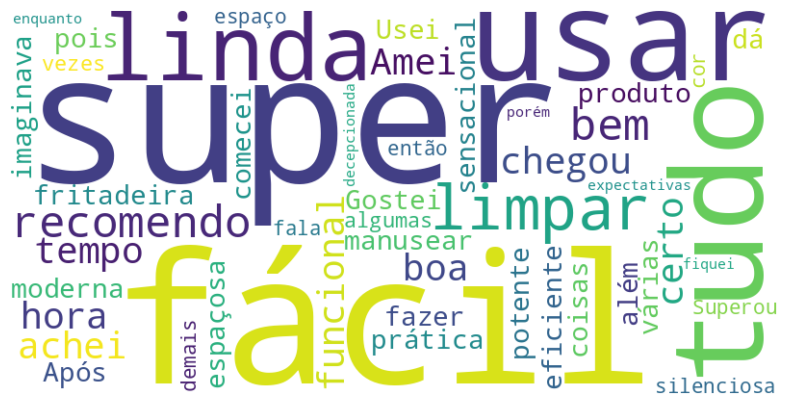

In [36]:
generate_wordcloud(data, 'Resenha', 'POS')

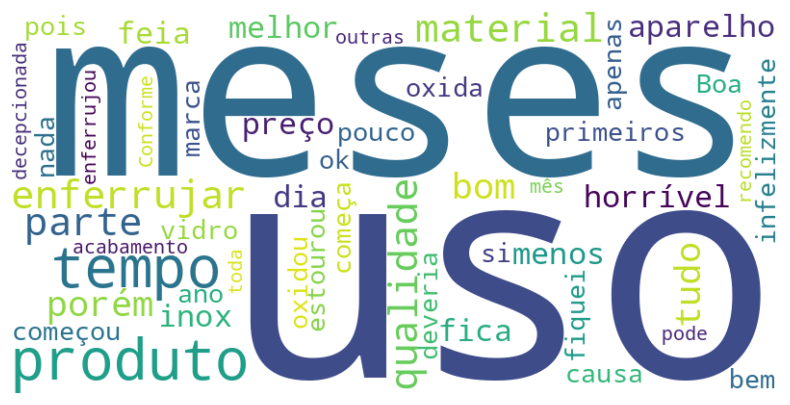

In [37]:
generate_wordcloud(data, 'Resenha', 'NEG')